In [3]:
#manipulation
import numpy as np
import pandas as pd

#this is just cool
from tqdm import tqdm

#visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')   #for optimum aesthetics 
import seaborn as sns

#natural language processing
import string
import re
from nltk.corpus import stopwords

#stemming/lemmatizing/vectorizing
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

#processing
from sklearn.model_selection import train_test_split

#ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')


In [4]:
data_df = pd.read_csv('Dataset_sentiment.csv',header=[0])

In [5]:
data_df.head()

,Text,Spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: naturally irresistible your corporate...,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subject: the stock trading gunslinger fanny i...,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_df.columns

Index(['Text', 'Spam', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [7]:
df = data_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7'], axis=1)

In [8]:
df = df.dropna().reset_index()
df = df.drop('index', axis=1)

In [9]:
df.head()

,Text,Spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


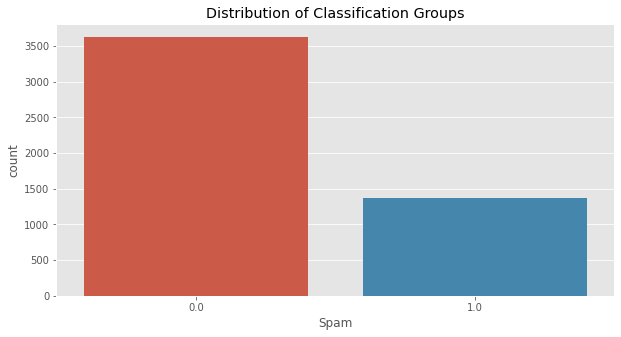

In [10]:
#set figure size
fig, ax = plt.subplots(figsize = (10, 5))

#create graphs
graph1 = sns.countplot(x = 'Spam', data = df)

#give title and plot
plt.title('Distribution of Classification Groups')
plt.show(graph1)

In [11]:
def clean_text(string_in):
    string_in = re.sub(r"subject","", string_in)
    string_in = re.sub(r"[^'A-Za-z0-9 ]+", "", string_in) # Remove all characters other than words a-z,A-Z,0-9
    string_in = re.sub(r"\d", " ", string_in)   # Remove numbers  
    string_in = re.sub(r"_+", " ", string_in)   # Remove consecutive underscores
    string_in = string_in.lower()              # Tranform to lower case    
    
    return string_in.strip()


In [12]:
df["Text"] = df['Text'].apply(clean_text)
df['Text'] = df['Text'].str.replace("subject","")
df['Text'] = df['Text'].str.replace(" ' ",'o')

In [13]:
df['Text'].head()

0     naturally irresistible your corporate identit...
1     the stock trading gunslinger  fanny is merril...
2     unbelievable new homes made easy  im wanting ...
3       color printing special  request additional ...
4     do not have money  get software cds from here...
Name: Text, dtype: object

In [14]:
df.Spam.value_counts()

0.0    3629
1.0    1368
Name: Spam, dtype: int64

In [15]:
import json
with open('contractions.json', 'r') as f:
    cont_dic = json.load(f)

In [16]:
def cont_to_meaning(val): 
  
    for x in val.split(): 
        if x in cont_dic.keys(): 
            val = val.replace(x, cont_dic[x]) 
    return val

In [17]:
df['Text'] = df['Text'].apply(lambda x: cont_to_meaning(x))

In [18]:
import nltk
nltk.download('wordnet')
#from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize(sentence):
    new_sentence = []
    for word in sentence.split():
        word = lemmatizer.lemmatize(word)
        new_sentence.append(word)
    return(" ".join(new_sentence))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [19]:
df['Text'] = df['Text'].apply(lemmatize)
df.head(5)

,Text,Spam
0,naturally irresistible your corporate identity...,1.0
1,the stock trading gunslinger fanny is merrill ...,1.0
2,unbelievable new home made easy im wanting to ...,1.0
3,color printing special request additional info...,1.0
4,do not have money get software cd from here so...,1.0


In [20]:
X = df['Text']
y = df['Spam']


In [21]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
x_train.head()

3941    re fw re valuation see you there steve origina...
2757    mit research on bandwidth pricing gentleman am...
4211    re tony hamilton chris e hired tony to support...
4912    re howard haughton no can do for wed thurs jef...
99      save your money buy getting this thing here yo...
Name: Text, dtype: object

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3997,)
(3997,)
(1000,)
(1000,)


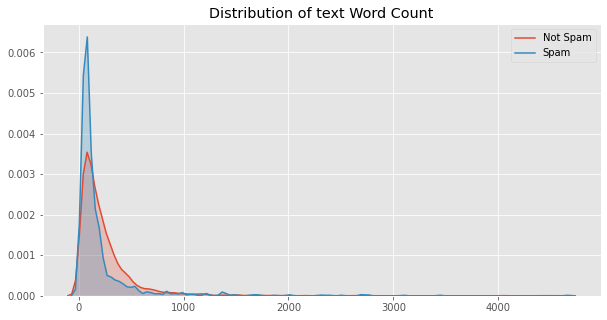

In [24]:
#create column for the number of words in tweet
df['word count'] = df['Text'].apply(lambda x: len(x.split()))

#split so we can use updated train set with new feature
train = df[:len(x_train)]

#define subplot to see graphs side by side
fig, ax = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(train['word count'][train['Spam'] == 0], shade = True, label = 'Not Spam')
sns.kdeplot(train['word count'][train['Spam'] == 1], shade = True, label = 'Spam')

#set title and plot
plt.title('Distribution of text Word Count')
plt.show()

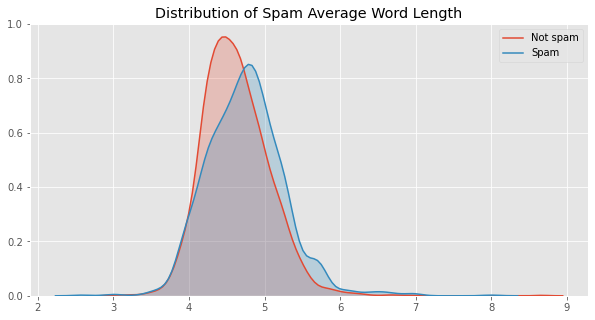

In [25]:
#define function to find average word length 
def average_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

#broadcast to text column
df['average_word_length'] = df['Text'].apply(average_word_length)

#split so we can use updated train set with new feature
train = df[:len(x_train)]

#define subplot to see graphs side by side
fig, ax = plt.subplots(figsize = (10, 5))
#create graphs
sns.kdeplot(train['average_word_length'][train['Spam'] == 0], shade = True, label = 'Not spam')
sns.kdeplot(train['average_word_length'][train['Spam'] == 1], shade = True, label = 'Spam')

#set title
plt.title('Distribution of Spam Average Word Length')

#splot graphs
plt.show()

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


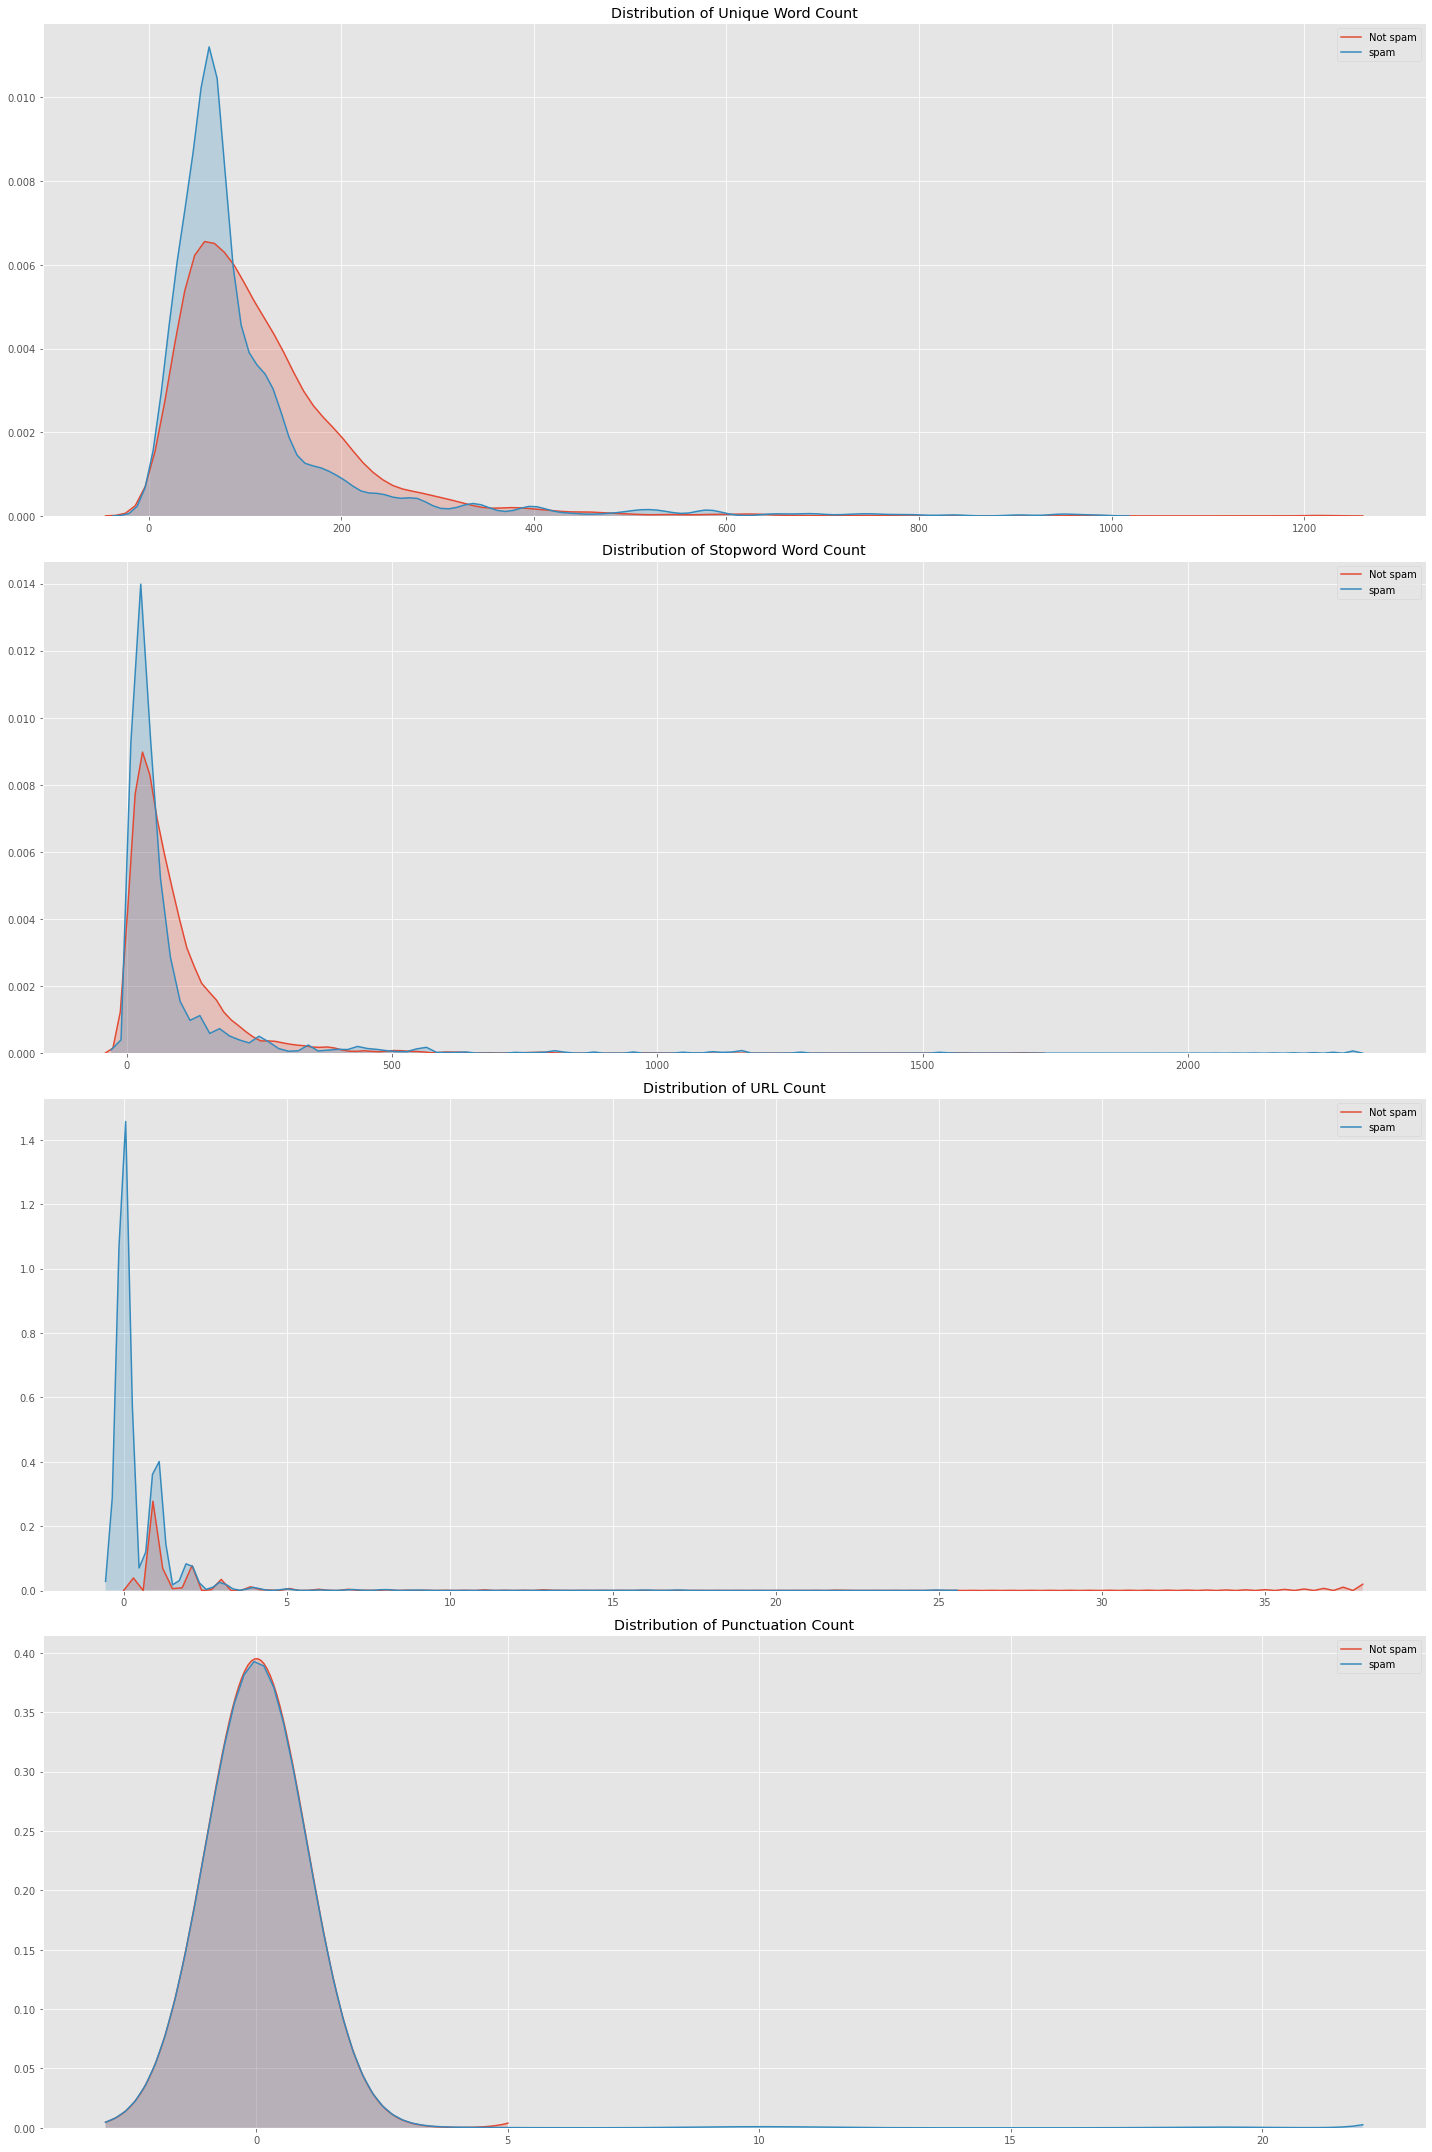

In [27]:
#add unique word count
df['unique_word_count'] = df['Text'].apply(lambda x: len(set(x.split())))

#add stopword count
df['stopword_count'] = df['Text'].apply(lambda x: len([i for i in x.lower().split() if i in stopwords]))

#add url count
df['url_count'] = df['Text'].apply(lambda x: len([i for i in x.lower().split() if 'http' in i or 'https' in i]))

#add mention count
df['mention_count'] = df['Text'].apply(lambda x: len([i for i in str(x) if i == '@']))

#add hashtag count
df['hashtag_count'] = df['Text'].apply(lambda x: len([i for i in str(x) if i == '#']))

#add punctuation count
df['punctuation_count'] = df['Text'].apply(lambda x: len([i for i in str(x) if i in string.punctuation]))

#split so we can use updated train set
train = df[:len(x_train)]
spam = train['Spam'] == 1

#produce graphs to visualize newly added features
fig, axes = plt.subplots(4, figsize=(20, 30))

graph1 = sns.kdeplot(train.loc[~spam]['unique_word_count'], shade = True, label = 'Not spam', ax=axes[0])
graph1 = sns.kdeplot(train.loc[spam]['unique_word_count'], shade = True, label = 'spam', ax=axes[0])
graph1.set_title('Distribution of Unique Word Count')

graph2 = sns.kdeplot(train.loc[~spam]['stopword_count'], shade = True, label = 'Not spam', ax=axes[1])
graph2 = sns.kdeplot(train.loc[spam]['stopword_count'], shade = True, label = 'spam', ax=axes[1])
graph2.set_title('Distribution of Stopword Word Count')

graph3 = sns.kdeplot(train.loc[~spam]['url_count'], shade = True, label = 'Not spam', ax=axes[2])
graph3 = sns.kdeplot(train.loc[spam]['url_count'], shade = True, label = 'spam', ax=axes[2])
graph3.set_title('Distribution of URL Count')

graph4 = sns.kdeplot(train.loc[~spam]['punctuation_count'], shade = True, label = 'Not spam', ax=axes[3], bw = 1)
graph4 = sns.kdeplot(train.loc[spam]['punctuation_count'], shade = True, label = 'spam', ax=axes[3], bw = 1)
graph4.set_title('Distribution of Punctuation Count')

fig.tight_layout()
plt.show()

In [28]:
tweets = [text for text in x_train]

In [29]:
len(tweets)

3997

In [30]:
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras import Input

# set the seed for the random generator for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

tokenizer = Tokenizer(oov_token="<OOV>", filters = "'!#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n")
tokenizer.fit_on_texts(tweets)
word_index = tokenizer.word_index
print(len(word_index))
sequences = tokenizer.texts_to_sequences(tweets)
padded_sequences = pad_sequences(sequences)
print(len(padded_sequences[0]))
print(padded_sequences.shape)
print("shape of data tensor: ", padded_sequences.shape)
print("shape of label tensor: ", y_train.shape)

Using TensorFlow backend.


27730
4665
(3997, 4665)
shape of data tensor:  (3997, 4665)
shape of label tensor:  (3997,)


In [31]:
MAX_SEQUENCE_LENGTH = padded_sequences.shape[1]
print(MAX_SEQUENCE_LENGTH)

4665


In [32]:
EMBEDDING_DIM = 200   #defined by size of GloVe dimesions

In [33]:
embeddings_index = {}
with open('glove.6B.200d.txt','r') as f:
    for line in tqdm(f):
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
f.close()

print('Found %s word vectors in the GloVe library' % len(embeddings_index))

73711it [00:04, 16716.16it/s]

Found 73711 word vectors in the GloVe library


In [34]:
#embed our vocab with the GloVe pretrained vocab
embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

100%|██████████| 27730/27730 [00:00<00:00, 404271.32it/s]


In [35]:
print("Our embedded matrix is of dimension", embedding_matrix.shape)

Our embedded matrix is of dimension (27731, 200)


In [36]:
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Dropout, Concatenate, LeakyReLU 
from keras import Input, Model, regularizers
from keras.optimizers import Adam
from keras.models import Sequential
from keras.callbacks import EarlyStopping

embedding = Embedding(len(word_index) + 1,
                        EMBEDDING_DIM,
                        weights=[embedding_matrix],
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False)   #we do not want embedding layer to train since it has been pretrained

In [37]:
from sklearn.preprocessing import StandardScaler

#define and scale our added features
meta_input = StandardScaler().fit_transform(df.iloc[:, 2:])
meta_input_train = meta_input[:len(x_train),:]
meta_input_test = meta_input[meta_input_train.shape[0]:,:]


In [38]:
print(meta_input.shape)
print(meta_input_train.shape)
print(meta_input_test.shape)

(4997, 8)
(3997, 8)
(1000, 8)


In [39]:
#create our first model
def create_lstm(spatial_dropout, dropout, recurrent_dropout, learning_rate):
    
    nlp_input = Input(shape = (MAX_SEQUENCE_LENGTH,), name = 'nlp_input')
    meta_input_train = Input(shape = (8, ), name = 'meta_train')
    emb = embedding(nlp_input)
    emb = SpatialDropout1D(rate = spatial_dropout)(emb)
    nlp_out = (Bidirectional(LSTM(100, dropout = dropout, recurrent_dropout = recurrent_dropout,
                                 kernel_regularizer = regularizers.l2(1e-4))))(emb)
    
    x = Concatenate()([nlp_out, meta_input_train])
    preds = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=[nlp_input , meta_input_train], outputs = preds)
    optimizer = Adam(learning_rate = learning_rate)
    
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model

In [40]:
def plot_learning_curves(history):
    fig, ax = plt.subplots(1, 2, figsize = (20, 10))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])

    ax[0].legend(['train', 'validation'], loc = 'upper left')
    ax[1].legend(['train', 'validation'], loc = 'upper left')

    fig.suptitle("Model Accuracy", fontsize=14)

    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')

    return plt.show()

In [41]:
#define dropout/learning rates
spatial_dropout = 0.2
dropout = 0.2
recurrent_dropout = 0.2
learning_rate = 3e-4

model1 = create_lstm(spatial_dropout, dropout, recurrent_dropout, learning_rate)
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
nlp_input (InputLayer)          (None, 4665)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 4665, 200)    5546200     nlp_input[0][0]                  
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 4665, 200)    0           embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 200)          240800      spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

In [42]:
#fit model
history1 = model1.fit([padded_sequences, meta_input_train], y_train, validation_split = .2,
         epochs = 20, batch_size = 23, verbose = 1)

Train on 3197 samples, validate on 800 samples
Epoch 1/20
3197/3197 [==============================] - 1563s 489ms/step - loss: 0.5323 - accuracy: 0.7632 - val_loss: 0.4281 - val_accuracy: 0.8163
Epoch 2/20
3197/3197 [==============================] - 1515s 474ms/step - loss: 0.3433 - accuracy: 0.8671 - val_loss: 0.2640 - val_accuracy: 0.9175
Epoch 3/20
3197/3197 [==============================] - 1525s 477ms/step - loss: 0.2807 - accuracy: 0.8990 - val_loss: 0.4048 - val_accuracy: 0.8138
Epoch 4/20
3197/3197 [==============================] - 1510s 472ms/step - loss: 0.2768 - accuracy: 0.8958 - val_loss: 0.2459 - val_accuracy: 0.8988
Epoch 5/20
3197/3197 [==============================] - 1504s 470ms/step - loss: 0.2400 - accuracy: 0.9146 - val_loss: 0.1973 - val_accuracy: 0.9275
Epoch 6/20
3197/3197 [==============================] - 1500s 469ms/step - loss: 0.2366 - accuracy: 0.9130 - val_loss: 0.2120 - val_accuracy: 0.9200
Epoch 7/20
3197/3197 [==============================] - 149